In [2]:
"""Delete ths cell when done!"""
%load_ext autoreload
%autoreload complete

In [3]:
import numpy as np
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
s = {
    'problem'           : "regression",
    'approach'          : "metric learning/non-parametric",
    'algorithm'         : "triplet network",
    'input'             : "samples from a distribution",
    'input type'        : "vectors",
    'input meaning'     : "spectrum", 
    'output'            : "samples from a distribution",
    'output type'       : "one number",
    'output meaning'    : "temperature or pressure, depending on distribution",
    'learning rate'     : 1e-4,
    'input dimension'   : 10000,
    'output dimension'  : 1,
    'feature dimension' : 300,
    'epoch'             : 1000,
    'epoch-development' : 1,
    'cross validation round': 16,
    'cross validation round-development' : 1,
    'batch size'        : 64,
    'best model folder' : 'triplet_best_model/'
}
# https://arxiv.org/pdf/1412.6622.pdf
import data_accessor as acc
datas = [
    'pressure_230516_discrete',
    'temperature_230509_discrete'
    ]
data_dictionary = acc.setup(datas)

loading pressure_230516_discrete__________________________
	input shape (number, dimension): (5000, 10000)
	label shape (number, dimension): (5000, 1)
	there are 16 folds
	3500 for training, 500 for validating, 1000 for testing
loading temperature_230509_discrete__________________________
	input shape (number, dimension): (6000, 10000)
	label shape (number, dimension): (6000, 1)
	there are 16 folds
	4200 for training, 600 for validating, 1200 for testing


__________CROSS VALIDATION__________
Cross-validation rounds: 16
Epochs: 1000
Datas to learn: 
	0: pressure_230516_discrete
	1: temperature_230509_discrete
🧵MULTI TASK, Interweave____________________________
we're learning: multiple tasks
given [1, 2, 3], [a, b, c]: learn [1, a, 2, b, 3, c], simple handling of different counts
>round 0
EARLY STOPPING @ epoch 16
min train loss: 0.016903582883398396
min valid loss: 0.012257535709068179


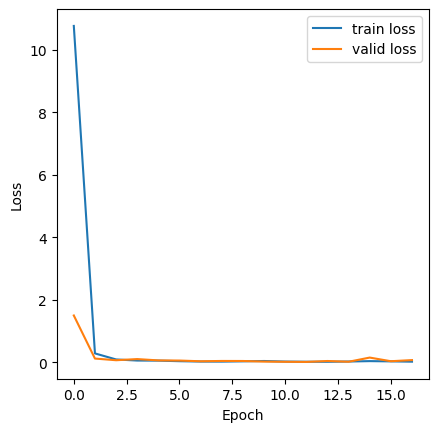

>round 1
EARLY STOPPING @ epoch 24
min train loss: 0.012505631297364954
min valid loss: 0.010297330872466167


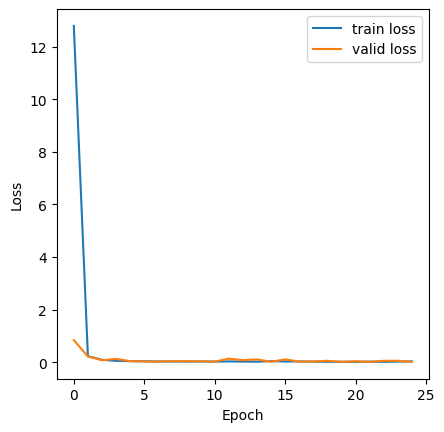

>round 2
EARLY STOPPING @ epoch 15
min train loss: 0.01857789221011903
min valid loss: 0.015469684472514523


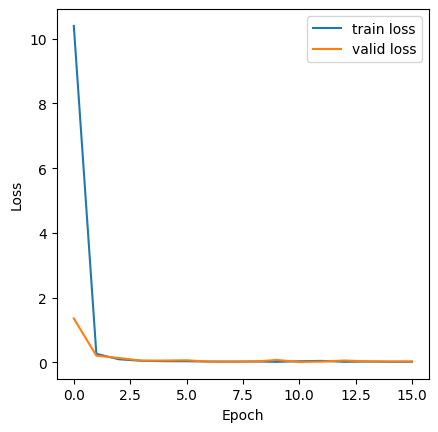

>round 3
EARLY STOPPING @ epoch 13
min train loss: 0.019985285018039638
min valid loss: 0.015276756034129195


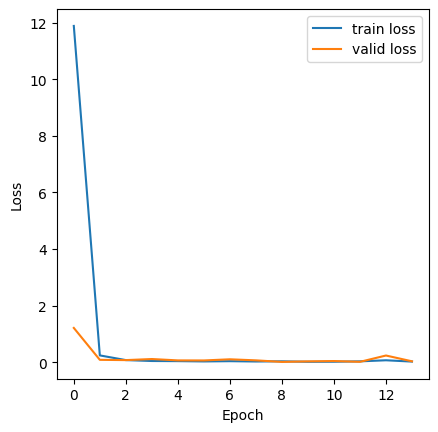

>round 4
EARLY STOPPING @ epoch 16
min train loss: 0.014732134882514635
min valid loss: 0.012596773966732953


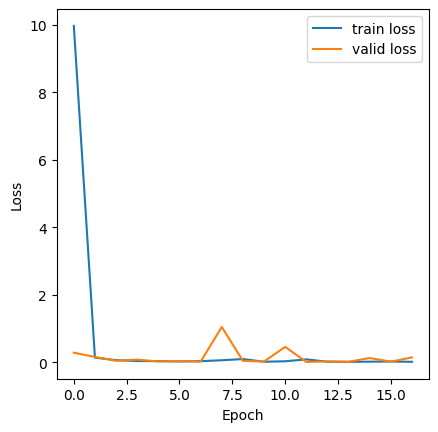

>round 5
EARLY STOPPING @ epoch 15
min train loss: 0.014489552798904171
min valid loss: 0.01677819646687971


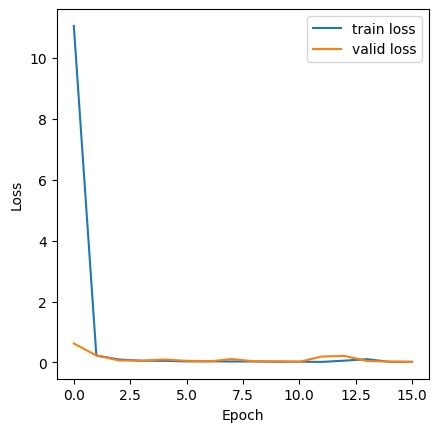

>round 6
EARLY STOPPING @ epoch 18
min train loss: 0.013656514673686225
min valid loss: 0.01652455867992507


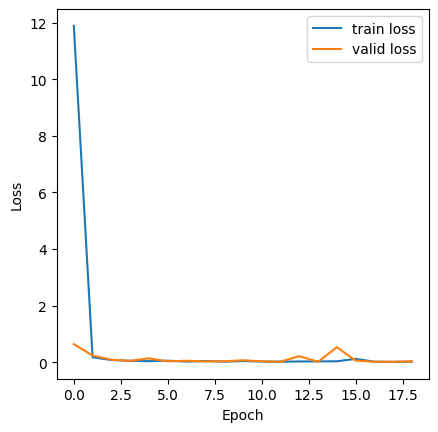

>round 7
EARLY STOPPING @ epoch 15
min train loss: 0.018856122377828872
min valid loss: 0.01275289369126161


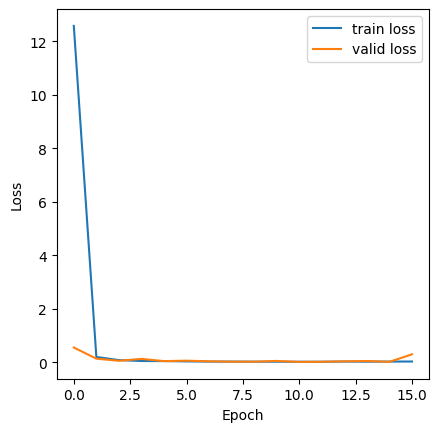

>round 8
EARLY STOPPING @ epoch 20
min train loss: 0.016960974001471906
min valid loss: 0.01209736242890358


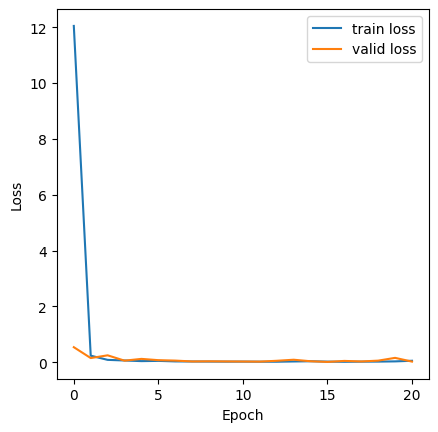

>round 9
EARLY STOPPING @ epoch 15
min train loss: 0.01402300580458577
min valid loss: 0.022373455473118357


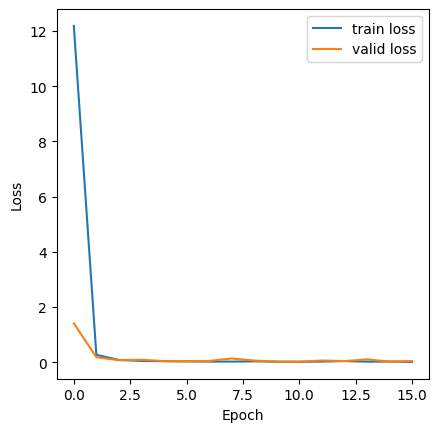

>round 10
EARLY STOPPING @ epoch 11
min train loss: 0.021762040636140453
min valid loss: 0.018792009084588952


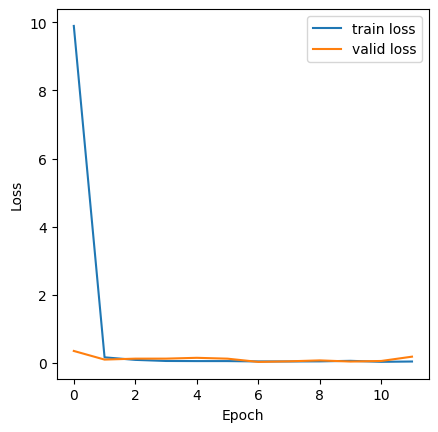

>round 11
EARLY STOPPING @ epoch 18
min train loss: 0.015250908741958377
min valid loss: 0.020583688384956784


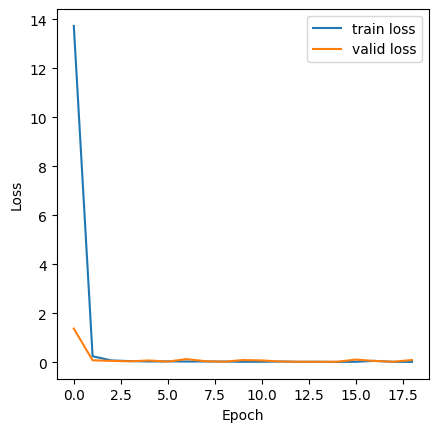

>round 12
EARLY STOPPING @ epoch 12
min train loss: 0.021348904129425604
min valid loss: 0.020724353070060413


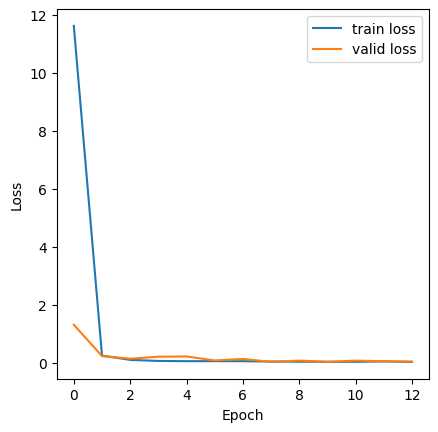

>round 13
EARLY STOPPING @ epoch 21
min train loss: 0.011720203167243192
min valid loss: 0.009915156574505899


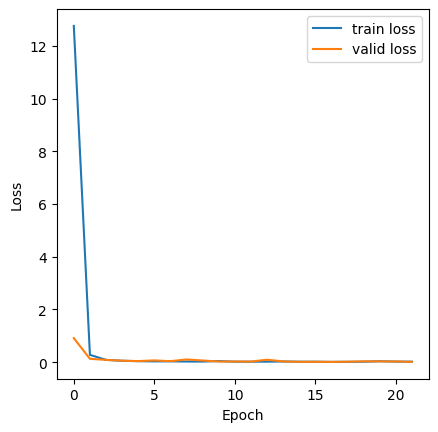

>round 14
EARLY STOPPING @ epoch 20
min train loss: 0.014242526005245438
min valid loss: 0.010770985209900472


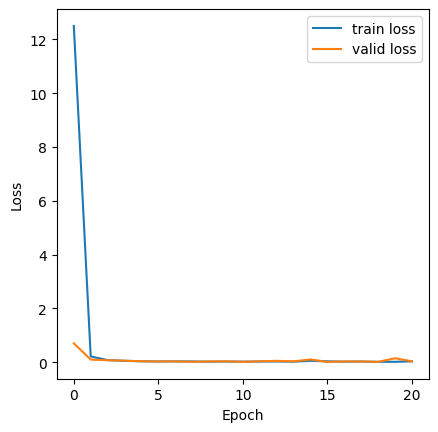

>round 15
EARLY STOPPING @ epoch 33
min train loss: 0.010413972841775861
min valid loss: 0.00996020857969092


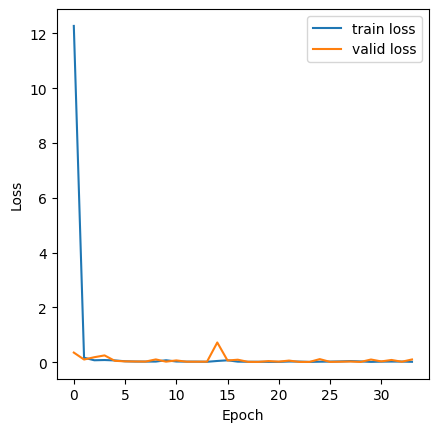

BEST model: CV=13.pth with 0.009915156574505899
trained datas by weaving them
Aggregate performance: Valid loss mean 0.014823184293668926, std 0.004000018763502628
😇 TRAINing COMPLETE____________________________
TEST____________________________
Testing pressure_230516_discrete, loss:  0.008945081353886053
Testing temperature_230509_discrete, loss:  0.004885396846619092


In [4]:
from CrossValidation import CrossValidator
from tools import SaveBestCrossValidationModel
from Siamese import SiameseDataset, SiameseAuxManager
from data import alternate_rows_itertools
# datas.reverse()
CVtor = CrossValidator(s['cross validation round'], 
                       s['epoch'], 
                       SaveBestCrossValidationModel(s['best model folder']), 
                       SiameseDataset,
                       datas,
                       data_dictionary,
                       SiameseAuxManager,
                       s,
                       device)
# CVtor.single_task_train(0)
# CVtor.multi_task_train_sequential()
CVtor.multi_task_train_weave(alternate_rows_itertools) 
CVtor.complete_notify()
CVtor.test_all()